# Recommendations with IBM

In this notebook, you will be putting your recommendation skills to use on real data from the IBM Watson Studio platform. 


You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/rubrics/3325/view).  **Please save regularly.**

By following the table of contents, you will build out a number of different methods for making recommendations that can be used for different situations. 


## Table of Contents

I. [Exploratory Data Analysis](#Exploratory-Data-Analysis)<br>
II. [Rank Based Recommendations](#Rank)<br>
III. [User-User Based Collaborative Filtering](#User-User)<br>
IV. [Content Based Recommendations (EXTRA - NOT REQUIRED)](#Content-Recs)<br>
V. [Matrix Factorization](#Matrix-Fact)<br>
VI. [Extras & Concluding](#conclusions)

At the end of the notebook, you will find directions for how to submit your work.  Let's get started by importing the necessary libraries and reading in the data.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import project_tests as t
import pickle

%matplotlib inline
plt.figure(figsize=(8, 5))

df = pd.read_csv('data/user-item-interactions.csv')
df_content = pd.read_csv('data/articles_community.csv')
del df['Unnamed: 0']
del df_content['Unnamed: 0']

# Show df to get an idea of the data
df

/var/folders/l6/qbkhzc7577xd785yrz_bvpbw0000gn/T/ipykernel_30932/1382775754.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,article_id,title,email
0,1430.0,"using pixiedust for fast, flexible, and easier...",ef5f11f77ba020cd36e1105a00ab868bbdbf7fe7
1,1314.0,healthcare python streaming application demo,083cbdfa93c8444beaa4c5f5e0f5f9198e4f9e0b
2,1429.0,use deep learning for image classification,b96a4f2e92d8572034b1e9b28f9ac673765cd074
3,1338.0,ml optimization using cognitive assistant,06485706b34a5c9bf2a0ecdac41daf7e7654ceb7
4,1276.0,deploy your python model as a restful api,f01220c46fc92c6e6b161b1849de11faacd7ccb2
...,...,...,...
45988,1324.0,ibm watson facebook posts for 2015,d21b998d7a4722310ceeaa3c6aaa181a36db2d73
45989,142.0,neural networks for beginners: popular types a...,d21b998d7a4722310ceeaa3c6aaa181a36db2d73
45990,233.0,bayesian nonparametric models – stats and bots,4faeed980a7cd11e0f3cf2058cc04daa2ef11452
45991,1160.0,analyze accident reports on amazon emr spark,abbf639ba05daa5249c520e290283a6d726ba78d


<Figure size 800x500 with 0 Axes>

In [3]:
# Show df_content to get an idea of the data
df_content

,doc_body,doc_description,doc_full_name,doc_status,article_id
0,Skip navigation Sign in SearchLoading...\r\n\r...,Detect bad readings in real time using Python ...,Detect Malfunctioning IoT Sensors with Streami...,Live,0
1,No Free Hunch Navigation * kaggle.com\r\n\r\n ...,"See the forest, see the trees. Here lies the c...",Communicating data science: A guide to present...,Live,1
2,☰ * Login\r\n * Sign Up\r\n\r\n * Learning Pat...,Here’s this week’s news in Data Science and Bi...,"This Week in Data Science (April 18, 2017)",Live,2
3,"DATALAYER: HIGH THROUGHPUT, LOW LATENCY AT SCA...",Learn how distributed DBs solve the problem of...,DataLayer Conference: Boost the performance of...,Live,3
4,Skip navigation Sign in SearchLoading...\r\n\r...,This video demonstrates the power of IBM DataS...,Analyze NY Restaurant data using Spark in DSX,Live,4
...,...,...,...,...,...
1051,PouchDB-find is a new API and syntax that allo...,PouchDB uses MapReduce as its default search m...,A look under the covers of PouchDB-find,Live,1046
1052,We compare discriminative and generative learn...,We compare discriminative and generative learn...,A comparison of logistic regression and naive ...,Live,1047
1053,"Essays about data, building products and boots...",In order to demystify some of the magic behind...,What I Learned Implementing a Classifier from ...,Live,1048
1054,NaN,Learn how to use IBM dashDB as data store for ...,Use dashDB with Spark,Live,1049


### <a class="anchor" id="Exploratory-Data-Analysis">Part I : Exploratory Data Analysis</a>

Use the dictionary and cells below to provide some insight into the descriptive statistics of the data.

`1.` What is the distribution of how many articles a user interacts with in the dataset?  Provide a visual and descriptive statistics to assist with giving a look at the number of times each user interacts with an article.  

The dataframe (content) contains 1056 rows with 5 columns.

The base df contains 45993 rows × 3 columns.

In [4]:
# check nulls in df
df.isnull().sum()

article_id     0
title          0
email         17
dtype: int64

In [5]:
len(df) - len(df.email.unique())

40844

Text(0.5, 1.0, 'Distribution Of Log User Interactions')

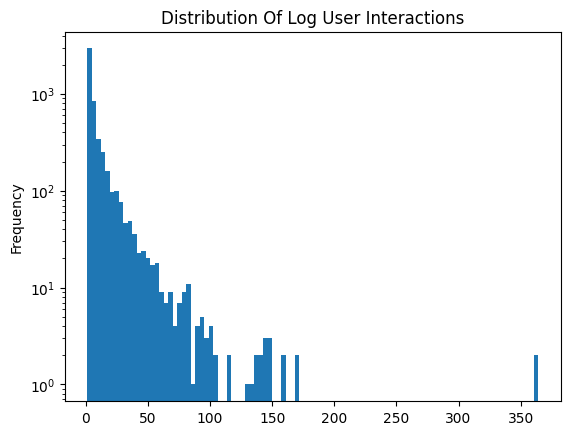

In [6]:
# Plotting the distribution of user interactions
email_hist = df['email'].value_counts(dropna = False) 
# np.histogram(email_hist, bins=100, normed=True)
email_hist.plot(kind='hist', bins=100, logy=True)

plt.title('Distribution Of Log User Interactions')

In [7]:
# check null properties
df_content.isnull().sum()

doc_body           14
doc_description     3
doc_full_name       0
doc_status          0
article_id          0
dtype: int64

In [8]:
email_hist.describe()

count    5149.000000
mean        8.932414
std        16.801011
min         1.000000
25%         1.000000
50%         3.000000
75%         9.000000
max       364.000000
Name: count, dtype: float64

In [9]:
# groupby email and count article_id
df.groupby('email')['article_id'].count().median()

3.0

In [10]:
# Fill in the median and maximum number of user_article interactions below

# 50% of individuals interact with ____ number of articles or fewer.
median_val = df.groupby('email')['article_id'].count().median()
# The maximum number of user-article interactions by any 1 user is ______.
max_views_by_user = df.groupby('email')['article_id'].count().max()

`2.` Explore and remove duplicate articles from the **df_content** dataframe.  

In [11]:
# Find and explore duplicate articles
df_content['article_id'].duplicated().sum()


5

In [12]:
# viewing all duplicates in a dataframe
df_content[df_content['article_id'].duplicated()]

,doc_body,doc_description,doc_full_name,doc_status,article_id
365,Follow Sign in / Sign up Home About Insight Da...,During the seven-week Insight Data Engineering...,Graph-based machine learning,Live,50
692,Homepage Follow Sign in / Sign up Homepage * H...,One of the earliest documented catalogs was co...,How smart catalogs can turn the big data flood...,Live,221
761,Homepage Follow Sign in Get started Homepage *...,Today’s world of data science leverages data f...,Using Apache Spark as a parallel processing fr...,Live,398
970,This video shows you how to construct queries ...,This video shows you how to construct queries ...,Use the Primary Index,Live,577
971,Homepage Follow Sign in Get started * Home\r\n...,"If you are like most data scientists, you are ...",Self-service data preparation with IBM Data Re...,Live,232


In [13]:
# viewing rows where article_id = 50
df_content[df_content['article_id'] == 50]

,doc_body,doc_description,doc_full_name,doc_status,article_id
50,Follow Sign in / Sign up Home About Insight Da...,Community Detection at Scale,Graph-based machine learning,Live,50
365,Follow Sign in / Sign up Home About Insight Da...,During the seven-week Insight Data Engineering...,Graph-based machine learning,Live,50


In [14]:
# Remove any rows that have the same article_id - only keep the first
df_content_recs_cleaned = df_content.drop_duplicates(subset=["article_id"])
df_content_recs_cleaned['article_id'].duplicated().sum()

0

In [15]:
df_content = df_content_recs_cleaned.copy()

`3.` Use the cells below to find:

**a.** The number of unique articles that have an interaction with a user.  
**b.** The number of unique articles in the dataset (whether they have any interactions or not).<br>
**c.** The number of unique users in the dataset. (excluding null values) <br>
**d.** The number of user-article interactions in the dataset.

In [16]:
print(df.shape)
print(df_content.shape)

(45993, 3)
(1051, 5)


In [17]:
# The number of unique articles that have an interaction with a user.
df.article_id.nunique()

714

In [18]:
# The number of unique articles
df_content.article_id.nunique()

1051

In [19]:
# The number of unique users
df.email.nunique()

5148

In [20]:
# The number of user-article interactions
df.shape[0]

45993

In [21]:
unique_articles = df.article_id.nunique() # The number of unique articles that have at least one interaction
total_articles =  df_content.article_id.nunique() # The number of unique articles on the IBM platform
unique_users = df.email.nunique() # The number of unique users
user_article_interactions = df.shape[0] # The number of user-article interactions

`4.` Use the cells below to find the most viewed **article_id**, as well as how often it was viewed.  After talking to the company leaders, the `email_mapper` function was deemed a reasonable way to map users to ids.  There were a small number of null values, and it was found that all of these null values likely belonged to a single user (which is how they are stored using the function below).

In [22]:
# The most viewed article in the dataset
df.article_id.value_counts()

article_id
1429.0    937
1330.0    927
1431.0    671
1427.0    643
1364.0    627
         ... 
1344.0      1
984.0       1
1113.0      1
675.0       1
662.0       1
Name: count, Length: 714, dtype: int64

In [23]:
most_viewed_article_id = str(df.article_id.value_counts().index[0]) # The most viewed article in the dataset as a string with one value following the decimal 
max_views = df.article_id.value_counts().iloc[0] # The most viewed article in the dataset was viewed how many times?

In [24]:
## No need to change the code here - this will be helpful for later parts of the notebook
# Run this cell to map the user email to a user_id column and remove the email column

def email_mapper():
    coded_dict = dict()
    cter = 1
    email_encoded = []
    
    for val in df['email']:
        if val not in coded_dict:
            coded_dict[val] = cter
            cter+=1
        
        email_encoded.append(coded_dict[val])
    return email_encoded

email_encoded = email_mapper()
del df['email']
df['user_id'] = email_encoded

# show header
df.head()

,article_id,title,user_id
0,1430.0,"using pixiedust for fast, flexible, and easier...",1
1,1314.0,healthcare python streaming application demo,2
2,1429.0,use deep learning for image classification,3
3,1338.0,ml optimization using cognitive assistant,4
4,1276.0,deploy your python model as a restful api,5


In [25]:
## If you stored all your results in the variable names above, 
## you shouldn't need to change anything in this cell

sol_1_dict = {
    '`50% of individuals have _____ or fewer interactions.`': median_val,
    '`The total number of user-article interactions in the dataset is ______.`': user_article_interactions,
    '`The maximum number of user-article interactions by any 1 user is ______.`': max_views_by_user,
    '`The most viewed article in the dataset was viewed _____ times.`': max_views,
    '`The article_id of the most viewed article is ______.`': most_viewed_article_id,
    '`The number of unique articles that have at least 1 rating ______.`': unique_articles,
    '`The number of unique users in the dataset is ______`': unique_users,
    '`The number of unique articles on the IBM platform`': total_articles
}

# Test your dictionary against the solution
t.sol_1_test(sol_1_dict)

It looks like you have everything right here! Nice job!


### <a class="anchor" id="Rank">Part II: Rank-Based Recommendations</a>

Unlike in the earlier lessons, we don't actually have ratings for whether a user liked an article or not.  We only know that a user has interacted with an article.  In these cases, the popularity of an article can really only be based on how often an article was interacted with.

`1.` Fill in the function below to return the **n** top articles ordered with most interactions as the top. Test your function using the tests below.

In [26]:
def get_top_articles(n, df=df):
    '''
    INPUT:
    n - (int) the number of top articles to return
    df - (pandas dataframe) df as defined at the top of the notebook 
    
    OUTPUT:
    top_articles - (list) A list of the top 'n' article titles 
    
    '''
    top_articles = df['title'].value_counts().index.tolist()[:n]
    top_articles = [str(i) for i in top_articles]
    
    return top_articles # Return the top article titles from df (not df_content)

def get_top_article_ids(n, df=df):
    '''
    INPUT:
    n - (int) the number of top articles to return
    df - (pandas dataframe) df as defined at the top of the notebook 
    
    OUTPUT:
    top_articles - (list) A list of the top 'n' article titles 
    
    '''
    top_articles = df['article_id'].value_counts().index.tolist()[:n]
    top_articles = [str(i) for i in top_articles]

    return top_articles # Return the top article ids

In [27]:
print(get_top_articles(10))
print(get_top_article_ids(10))

['use deep learning for image classification', 'insights from new york car accident reports', 'visualize car data with brunel', 'use xgboost, scikit-learn & ibm watson machine learning apis', 'predicting churn with the spss random tree algorithm', 'healthcare python streaming application demo', 'finding optimal locations of new store using decision optimization', 'apache spark lab, part 1: basic concepts', 'analyze energy consumption in buildings', 'gosales transactions for logistic regression model']
['1429.0', '1330.0', '1431.0', '1427.0', '1364.0', '1314.0', '1293.0', '1170.0', '1162.0', '1304.0']


In [28]:
# Test your function by returning the top 5, 10, and 20 articles
top_5 = get_top_articles(5)
top_10 = get_top_articles(10)
top_20 = get_top_articles(20)

# Test each of your three lists from above
t.sol_2_test(get_top_articles)

Your top_5 looks like the solution list! Nice job.
Your top_10 looks like the solution list! Nice job.
Your top_20 looks like the solution list! Nice job.


### <a class="anchor" id="User-User">Part III: User-User Based Collaborative Filtering</a>


`1.` Use the function below to reformat the **df** dataframe to be shaped with users as the rows and articles as the columns.  

* Each **user** should only appear in each **row** once.


* Each **article** should only show up in one **column**.  


* **If a user has interacted with an article, then place a 1 where the user-row meets for that article-column**.  It does not matter how many times a user has interacted with the article, all entries where a user has interacted with an article should be a 1.  


* **If a user has not interacted with an item, then place a zero where the user-row meets for that article-column**. 

Use the tests to make sure the basic structure of your matrix matches what is expected by the solution.

In [29]:
# create the user-article matrix with 1's and 0's
def create_pivot_matrix(df_count):
    """Create a pivot table with users as rows and articles as columns"""
    return df_count.pivot_table(values='title', index='user_id', columns='article_id')

def convert_to_binary_interactions(user_item_matrix):
    """Convert interaction counts to binary values (0 or 1)"""
    matrix = user_item_matrix.copy()
    matrix.replace(np.nan, 0, inplace=True)
    return matrix.applymap(lambda x: 1 if x > 0 else x)

def create_user_item_matrix(df):
    '''
    INPUT:
    df - pandas dataframe with article_id, title, user_id columns
    
    OUTPUT:
    user_item - user item matrix 
    
    Description:
    Return a matrix with user ids as rows and article ids on the columns with 1 values where a user interacted with 
    an article and a 0 otherwise
    '''
    df_count = df.groupby(['user_id', 'article_id']).count().reset_index()
    user_item = create_pivot_matrix(df_count)
    user_item = convert_to_binary_interactions(user_item)
    
    return user_item # return the user_item matrix 

user_item = create_user_item_matrix(df)

/var/folders/l6/qbkhzc7577xd785yrz_bvpbw0000gn/T/ipykernel_30932/1707746907.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return matrix.applymap(lambda x: 1 if x > 0 else x)


In [30]:
## Tests: You should just need to run this cell.  Don't change the code.
assert user_item.shape[0] == 5149, "Oops!  The number of users in the user-article matrix doesn't look right."
assert user_item.shape[1] == 714, "Oops!  The number of articles in the user-article matrix doesn't look right."
assert user_item.sum(axis=1)[1] == 36, "Oops!  The number of articles seen by user 1 doesn't look right."
print("You have passed our quick tests!  Please proceed!")

You have passed our quick tests!  Please proceed!


`2.` Complete the function below which should take a user_id and provide an ordered list of the most similar users to that user (from most similar to least similar).  The returned result should not contain the provided user_id, as we know that each user is similar to him/herself. Because the results for each user here are binary, it (perhaps) makes sense to compute similarity as the dot product of two users. 

Use the tests to test your function.

In [31]:
def find_similar_users(user_id, user_item=user_item):
    '''
    INPUT:
    user_id - (int) a user_id
    user_item - (pandas dataframe) matrix of users by articles: 
                1's when a user has interacted with an article, 0 otherwise
    
    OUTPUT:
    similar_users - (list) an ordered list where the closest users (largest dot product users)
                    are listed first
    
    Description:
    Computes the similarity of every pair of users based on the dot product
    Returns an ordered
    
    '''
    ### Previous submission
    # # compute similarity of each user to the provided user
    # dot_prod_users = user_item.dot(np.transpose(user_item))
    
    # # sort by similarity
    # sim_users = dot_prod_users[user_id].sort_values(ascending = False)
    
    # # create list of just the ids
    # most_similar_users = sim_users.index.tolist()
    
    # # remove the own user's id
    # most_similar_users.remove(user_id)

    ### New submission
    # Compute similarity of each user to the provided user
    user_matrix = user_item.values
    
    similarities = np.dot(user_matrix, user_matrix.T)
    magnitudes = np.sqrt((user_item ** 2).sum(axis=1))
    
    magnitudes_matrix = np.outer(magnitudes, magnitudes)
    cosine_sim = similarities / magnitudes_matrix
    
    similar_users = pd.Series(cosine_sim[user_id], index=user_item.index)
    
    # Get list of user ids and remove the input user
    most_similar_users = similar_users.index.tolist()
    most_similar_users.remove(user_id)
    
       
    return most_similar_users # return a list of the users in order from most to least similar

In [32]:
# Do a spot check of your function
print("The 10 most similar users to user 1 are: {}".format(find_similar_users(1)[:10]))
print("The 5 most similar users to user 3933 are: {}".format(find_similar_users(3933)[:5]))
print("The 3 most similar users to user 46 are: {}".format(find_similar_users(46)[:3]))

The 10 most similar users to user 1 are: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
The 5 most similar users to user 3933 are: [1, 2, 3, 4, 5]
The 3 most similar users to user 46 are: [1, 2, 3]


`3.` Now that you have a function that provides the most similar users to each user, you will want to use these users to find articles you can recommend.  Complete the functions below to return the articles you would recommend to each user. 

In [ ]:
def get_article_names(article_ids, df=df):
    '''
    INPUT:
    article_ids - (list) a list of article ids
    df - (pandas dataframe) df as defined at the top of the notebook
    
    OUTPUT:
    article_names - (list) a list of article names associated with the list of article ids 
                    (this is identified by the title column)
    '''

    article_names = []

    for idx in article_ids:
        article_names.append(df[df['article_id'] == float(idx)].max()['title'])
    
    return article_names # Return the article names associated with list of article ids


def get_user_articles(user_id, user_item=user_item):
    '''
    INPUT:
    user_id - (int) a user id
    user_item - (pandas dataframe) matrix of users by articles: 
                1's when a user has interacted with an article, 0 otherwise
    
    OUTPUT:
    article_ids - (list) a list of the article ids seen by the user
    article_names - (list) a list of article names associated with the list of article ids 
                    (this is identified by the doc_full_name column in df_content)
    
    Description:
    Provides a list of the article_ids and article titles that have been seen by a user
    '''

    article_ids = user_item.loc[user_id][user_item.loc[user_id] == 1].index.astype('str')
    
    article_names = []

    for idx in article_ids:
        article_names.append(df[df['article_id'] == float(idx)].max()['title']) # need to use df instead of df_content as it only has 1051 rows
    
    return article_ids, article_names # return the ids and names



def user_user_recs(user_id, m=10):
    '''
    INPUT:
    user_id - (int) a user id
    m - (int) the number of recommendations you want for the user
    
    OUTPUT:
    recs - (list) a list of recommendations for the user
    
    Description:
    Loops through the users based on closeness to the input user_id
    For each user - finds articles the user hasn't seen before and provides them as recs
    Does this until m recommendations are found
    
    Notes:
    Users who are the same closeness are chosen arbitrarily as the 'next' user
    
    For the user where the number of recommended articles starts below m 
    and ends exceeding m, the last items are chosen arbitrarily
    
    '''
    # Previous submission
    # recs = []
    
    # user_articles_seen = get_user_articles(user_id)[0] #seen by our user
    # closest_users = find_similar_users(user_id) # users closest to our user
    
    # for others in closest_users:
        
    #     others_articles_seen = get_user_articles(others)[0] # articles seen by others like our user
    #     new_recs = np.setdiff1d(others_articles_seen, user_articles_seen, assume_unique=True) #find those not seen by user
    #     recs = np.unique(np.concatenate([new_recs, recs], axis = 0)) # concate arrays and only return unique values

    #     if len(recs) > m-1:
    #         break
    
    # return recs[:m] # return your recommendations for this user_id    
    
    ### New submission
    target_user_articles = set(get_user_articles(user_id)[0])
    similar_users = find_similar_users(user_id)

    article_scores = {}
    for similar_user in similar_users:
        user_articles = set(get_user_articles(similar_user)[0])
        new_articles = user_articles - target_user_articles
        
        for article in new_articles:
            if article not in article_scores:
                article_scores[article] = 1
            else:
                article_scores[article] += 1
            
        # Break
        if len(article_scores) >= m:
            break
    
    # Sort articles by frequency
    recommendations = sorted(article_scores.items(), 
                           key=lambda x: x[1], 
                           reverse=True)
    
    return [article[0] for article in recommendations[:m]]


In [75]:
user_user_recs(1, 10)

['1314.0',
 '1422.0',
 '1176.0',
 '1024.0',
 '12.0',
 '29.0',
 '1397.0',
 '681.0',
 '720.0',
 '1165.0']

In [76]:
# Check Results
get_article_names(user_user_recs(1, 10)) # Return 10 recommendations for user 1

['healthcare python streaming application demo',
 'use r dataframes & ibm watson natural language understanding',
 'build a python app on the streaming analytics service',
 'using deep learning to reconstruct high-resolution audio',
 'timeseries data analysis of iot events by using jupyter notebook',
 'experience iot with coursera',
 'total employment, by economic activity (thousands)',
 'real-time sentiment analysis of twitter hashtags with spark (+ pixiedust)',
 'data visualization playbook: telling the data story',
 'analyze precipitation data']

In [77]:
# Test your functions here - No need to change this code - just run this cell
assert set(get_article_names(['1024.0', '1176.0', '1305.0', '1314.0', '1422.0', '1427.0'])) == set(['using deep learning to reconstruct high-resolution audio', 'build a python app on the streaming analytics service', 'gosales transactions for naive bayes model', 'healthcare python streaming application demo', 'use r dataframes & ibm watson natural language understanding', 'use xgboost, scikit-learn & ibm watson machine learning apis']), "Oops! Your the get_article_names function doesn't work quite how we expect."
assert set(get_article_names(['1320.0', '232.0', '844.0'])) == set(['housing (2015): united states demographic measures','self-service data preparation with ibm data refinery','use the cloudant-spark connector in python notebook']), "Oops! Your the get_article_names function doesn't work quite how we expect."
assert set(get_user_articles(20)[0]) == set(['1320.0', '232.0', '844.0'])
assert set(get_user_articles(20)[1]) == set(['housing (2015): united states demographic measures', 'self-service data preparation with ibm data refinery','use the cloudant-spark connector in python notebook'])
assert set(get_user_articles(2)[0]) == set(['1024.0', '1176.0', '1305.0', '1314.0', '1422.0', '1427.0'])
assert set(get_user_articles(2)[1]) == set(['using deep learning to reconstruct high-resolution audio', 'build a python app on the streaming analytics service', 'gosales transactions for naive bayes model', 'healthcare python streaming application demo', 'use r dataframes & ibm watson natural language understanding', 'use xgboost, scikit-learn & ibm watson machine learning apis'])
print("If this is all you see, you passed all of our tests!  Nice job!")

If this is all you see, you passed all of our tests!  Nice job!


`4.` Now we are going to improve the consistency of the **user_user_recs** function from above.  

* Instead of arbitrarily choosing when we obtain users who are all the same closeness to a given user - choose the users that have the most total article interactions before choosing those with fewer article interactions.


* Instead of arbitrarily choosing articles from the user where the number of recommended articles starts below m and ends exceeding m, choose articles with the articles with the most total interactions before choosing those with fewer total interactions. This ranking should be  what would be obtained from the **top_articles** function you wrote earlier.

In [ ]:
def get_top_sorted_users(user_id, df=df, user_item=user_item):
    '''
    INPUT:
    user_id - (int)
    df - (pandas dataframe) df as defined at the top of the notebook 
    user_item - (pandas dataframe) matrix of users by articles: 
            1's when a user has interacted with an article, 0 otherwise
    
            
    OUTPUT:
    neighbors_df - (pandas dataframe) a dataframe with:
                    neighbor_id - is a neighbor user_id
                    similarity - measure of the similarity of each user to the provided user_id
                    num_interactions - the number of articles viewed by the user - if a u
                    
    Other Details - sort the neighbors_df by the similarity and then by number of interactions where 
                    highest of each is higher in the dataframe
     
    '''
    neighbors = []
    
    for user in user_item.index:
        if user == user_id:
            continue

        neighbors.append({
            'neighbor_id': user, 
            'similarity': np.dot(user_item.loc[user_id, :], user_item.loc[user, :]),
            'num_interactions': df[df['user_id'] == user]['article_id'].count()
        })
                        
    neighbors_df = pd.DataFrame.from_records(neighbors)                                  
    neighbors_df = neighbors_df.sort_values(by = ['similarity', 'num_interactions'], ascending = False)
    
    return neighbors_df # Return the dataframe specified in the doc_string


def user_user_recs_part2(user_id, m=10):
    '''
    INPUT:
    user_id - (int) a user id
    m - (int) the number of recommendations you want for the user
    
    OUTPUT:
    recs - (list) a list of recommendations for the user by article id
    rec_names - (list) a list of recommendations for the user by article title
    
    Description:
    Loops through the users based on closeness to the input user_id
    For each user - finds articles the user hasn't seen before and provides them as recs
    Does this until m recommendations are found
    
    Notes:
    * Choose the users that have the most total article interactions 
    before choosing those with fewer article interactions.

    * Choose articles with the articles with the most total interactions 
    before choosing those with fewer total interactions. 
   
    '''
    recs = {}
    ### Previous submission
    # rec_names = []
    # neighbors_df = get_top_sorted_users(user_id)
    # user_articles, _ = get_user_articles(user_id)
    
    # for user in neighbors_df['neighbor_id']:
    #     for id in [str(id) for id in get_top_article_ids(100)]:
    #         if len(recs) >= m:
    #             break
    #         else:
    #             if id not in user_articles:
    #                 recs.append(id) 
    
    # # get name of article
    # for name in recs:
    #     rec_name = df[df.article_id == float(name)].iloc[0,1]  
    #     rec_names.append(rec_name)

    ### New submission
    user_articles, _ = get_user_articles(user_id)
    
    similar_users = pd.DataFrame({
        'neighbor_id': find_similar_users(user_id),
        'weight': np.linspace(1, 0.1, len(find_similar_users(user_id)))
    })
    
    for idx, row in similar_users.iterrows():
        neighbor_articles, _ = get_user_articles(row['neighbor_id'])
        
        for article in neighbor_articles:
            if article not in user_articles:
                if article in recs:
                    recs[article] += row['weight']
                else:
                    recs[article] = row['weight']
    
    sorted_recs = sorted(recs.items(), key=lambda x: x[1], reverse=True)
    
    recs = [str(article[0]) for article in sorted_recs[:m]]
    rec_names = [df[df.article_id == float(article)].iloc[0,1] for article in recs]
    
    return recs, rec_names

In [37]:
# Quick spot check - don't change this code - just use it to test your functions
rec_ids, rec_names = user_user_recs_part2(20, 10)
print("The top 10 recommendations for user 20 are the following article ids:")
print(rec_ids)
print()
print("The top 10 recommendations for user 20 are the following article names:")
print(rec_names)

The top 10 recommendations for user 20 are the following article ids:
['1330.0', '1429.0', '1364.0', '1314.0', '1398.0', '1431.0', '1427.0', '1271.0', '1160.0', '43.0']

The top 10 recommendations for user 20 are the following article names:
['insights from new york car accident reports', 'use deep learning for image classification', 'predicting churn with the spss random tree algorithm', 'healthcare python streaming application demo', 'total population by country', 'visualize car data with brunel', 'use xgboost, scikit-learn & ibm watson machine learning apis', 'customer demographics and sales', 'analyze accident reports on amazon emr spark', 'deep learning with tensorflow course by big data university']


`5.` Use your functions from above to correctly fill in the solutions to the dictionary below.  Then test your dictionary against the solution.  Provide the code you need to answer each following the comments below.

In [38]:
get_top_sorted_users(1).iloc[0].neighbor_id

3933.0

In [39]:
get_top_sorted_users(131).iloc[9].neighbor_id

242.0

In [40]:
### Tests with a dictionary of results

user1_most_sim = get_top_sorted_users(1).iloc[0].neighbor_id # Find the user that is most similar to user 1 
user131_10th_sim = get_top_sorted_users(131).iloc[9].neighbor_id # Find the 10th most similar user to user 131

In [41]:
## Dictionary Test Here
sol_5_dict = {
    'The user that is most similar to user 1.': user1_most_sim, 
    'The user that is the 10th most similar to user 131': user131_10th_sim,
}

t.sol_5_test(sol_5_dict)

This all looks good!  Nice job!


`6.` If we were given a new user, which of the above functions would you be able to use to make recommendations?  Explain.  Can you think of a better way we might make recommendations?  Use the cell below to explain a better method for new users.

For a new user, we could use the rank-based recommendations and `get_top_articles` function since it doesn't require any user history - it simply recommends the most popular articles across all users. 

However, this is a very basic approach that doesn't personalize recommendations. Instead, we could use the collaborative filtering approach and `get_top_article_ids` function. This function returns the articles that are most similar to the user's interests.

`7.` Using your existing functions, provide the top 10 recommended articles you would provide for the a new user below.  You can test your function against our thoughts to make sure we are all on the same page with how we might make a recommendation.

In [42]:
new_user = '0.0'

# What would your recommendations be for this new user '0.0'?  As a new user, they have no observed articles.
# Provide a list of the top 10 article ids you would give to 
new_user_recs = get_top_article_ids(10, df) # Your recommendations here

In [43]:
assert set(new_user_recs) == set(['1314.0','1429.0','1293.0','1427.0','1162.0','1364.0','1304.0','1170.0','1431.0','1330.0']), "Oops!  It makes sense that in this case we would want to recommend the most popular articles, because we don't know anything about these users."

print("That's right!  Nice job!")

That's right!  Nice job!


### <a class="anchor" id="Content-Recs">Part IV: Content Based Recommendations (EXTRA - NOT REQUIRED)</a>

Another method we might use to make recommendations is to perform a ranking of the highest ranked articles associated with some term.  You might consider content to be the **doc_body**, **doc_description**, or **doc_full_name**.  There isn't one way to create a content based recommendation, especially considering that each of these columns hold content related information.  

`1.` Use the function body below to create a content based recommender.  Since there isn't one right answer for this recommendation tactic, no test functions are provided.  Feel free to change the function inputs if you decide you want to try a method that requires more input values.  The input values are currently set with one idea in mind that you may use to make content based recommendations.  One additional idea is that you might want to choose the most popular recommendations that meet your 'content criteria', but again, there is a lot of flexibility in how you might make these recommendations.

### This part is NOT REQUIRED to pass this project.  However, you may choose to take this on as an extra way to show off your skills.

In [44]:
def make_content_recs():
    '''
    INPUT:
    
    OUTPUT:
    
    '''

`2.` Now that you have put together your content-based recommendation system, use the cell below to write a summary explaining how your content based recommender works.  Do you see any possible improvements that could be made to your function?  Is there anything novel about your content based recommender?

### This part is NOT REQUIRED to pass this project.  However, you may choose to take this on as an extra way to show off your skills.

**Write an explanation of your content based recommendation system here.**

`3.` Use your content-recommendation system to make recommendations for the below scenarios based on the comments.  Again no tests are provided here, because there isn't one right answer that could be used to find these content based recommendations.

### This part is NOT REQUIRED to pass this project.  However, you may choose to take this on as an extra way to show off your skills.

In [45]:
# make recommendations for a brand new user


# make a recommendations for a user who only has interacted with article id '1427.0'



### <a class="anchor" id="Matrix-Fact">Part V: Matrix Factorization</a>

In this part of the notebook, you will build use matrix factorization to make article recommendations to the users on the IBM Watson Studio platform.

`1.` You should have already created a **user_item** matrix above in **question 1** of **Part III** above.  This first question here will just require that you run the cells to get things set up for the rest of **Part V** of the notebook. 

In [46]:
# Load the matrix here
user_item_matrix = pd.read_pickle('user_item_matrix.p')

In [47]:
# quick look at the matrix
user_item_matrix.head()

article_id,0.0,100.0,1000.0,1004.0,1006.0,1008.0,101.0,1014.0,1015.0,1016.0,...,977.0,98.0,981.0,984.0,985.0,986.0,990.0,993.0,996.0,997.0
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


`2.` In this situation, you can use Singular Value Decomposition from [numpy](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.linalg.svd.html) on the user-item matrix.  Use the cell to perform SVD, and explain why this is different than in the lesson.

In [48]:
# Perform SVD on the User-Item Matrix Here

# use the built in to get the three matrices
u, s, vt = np.linalg.svd(user_item_matrix)

In [49]:
u, s, vt

(array([[-4.30899801e-02,  8.30671762e-03,  2.75704572e-02, ...,
         -1.42702422e-04,  1.19347129e-04, -5.75358882e-03],
        [-1.03765691e-02,  1.64771768e-02,  6.04781444e-03, ...,
          1.74998634e-03,  1.59917801e-03, -1.23785783e-03],
        [-4.98474594e-02,  1.44789670e-03, -1.64960631e-02, ...,
          1.91803148e-03,  2.26468358e-04,  2.22115733e-03],
        ...,
        [-3.22580101e-05, -7.76317124e-05,  5.55685276e-05, ...,
          9.30992797e-01, -1.51368387e-04, -6.20100705e-04],
        [-2.46741942e-03,  3.80247363e-03, -4.46702539e-03, ...,
         -1.35258396e-04,  9.93263251e-01, -4.74500494e-04],
        [-4.91946427e-04, -1.00943223e-03,  4.99509739e-04, ...,
         -3.20822975e-04, -1.32949356e-04,  9.68239881e-01]]),
 array([5.53457037e+01, 2.32486418e+01, 2.17600228e+01, 2.06583341e+01,
        1.99708867e+01, 1.95569462e+01, 1.91632342e+01, 1.87197508e+01,
        1.83438615e+01, 1.80639261e+01, 1.76377686e+01, 1.74335474e+01,
        1.743

In [50]:
u.shape, s.shape, vt.shape

((5149, 5149), (714,), (714, 714))

**Provide your response here.**

`3.` Now for the tricky part, how do we choose the number of latent features to use?  Running the below cell, you can see that as the number of latent features increases, we obtain a lower error rate on making predictions for the 1 and 0 values in the user-item matrix.  Run the cell below to get an idea of how the accuracy improves as we increase the number of latent features.

/Users/dungnm31.sc/miniconda3/envs/dev/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


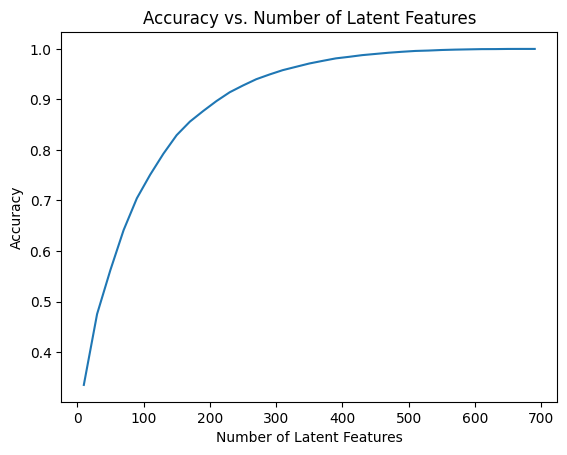

In [ ]:
num_latent_feats = np.arange(10, 700+10, 20)
sum_errs = []

for k in num_latent_feats:
    # restructure with k latent features
    s_new, u_new, vt_new = np.diag(s[:k]), u[:, :k], vt[:k, :]
    
    # take dot product
    user_item_est = np.around(np.dot(np.dot(u_new, s_new), vt_new))
    
    # compute error for each prediction to actual value
    diffs = np.subtract(user_item_matrix, user_item_est)
    
    # total errors and keep track of them
    err = np.sum(np.sum(np.abs(diffs)))
    sum_errs.append(err)
    
    
plt.plot(num_latent_feats, 1 - np.array(sum_errs)/df.shape[0]);
plt.xlabel('Number of Latent Features');
plt.ylabel('Accuracy');
plt.title('Accuracy vs. Number of Latent Features');

`4.` From the above, we can't really be sure how many features to use, because simply having a better way to predict the 1's and 0's of the matrix doesn't exactly give us an indication of if we are able to make good recommendations.  Instead, we might split our dataset into a training and test set of data, as shown in the cell below.  

Use the code from question 3 to understand the impact on accuracy of the training and test sets of data with different numbers of latent features. Using the split below: 

* How many users can we make predictions for in the test set?  
* How many users are we not able to make predictions for because of the cold start problem?
* How many articles can we make predictions for in the test set?  
* How many articles are we not able to make predictions for because of the cold start problem?

In [52]:
df_train = df.head(40000)
df_test = df.tail(5993)

def create_test_and_train_user_item(df_train, df_test):
    '''
    INPUT:
    df_train - training dataframe
    df_test - test dataframe
    
    OUTPUT:
    user_item_train - a user-item matrix of the training dataframe 
                      (unique users for each row and unique articles for each column)
    user_item_test - a user-item matrix of the testing dataframe 
                    (unique users for each row and unique articles for each column)
    test_idx - all of the test user ids
    test_arts - all of the test article ids
    
    '''
    user_item_train = create_user_item_matrix(df_train)
    user_item_test = create_user_item_matrix(df_test)
    
    test_idx = user_item_test.index
    test_arts = user_item_test.columns
    
    return user_item_train, user_item_test, test_idx, test_arts

user_item_train, user_item_test, test_idx, test_arts = create_test_and_train_user_item(df_train, df_test)

/var/folders/l6/qbkhzc7577xd785yrz_bvpbw0000gn/T/ipykernel_30932/1707746907.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return matrix.applymap(lambda x: 1 if x > 0 else x)
/var/folders/l6/qbkhzc7577xd785yrz_bvpbw0000gn/T/ipykernel_30932/1707746907.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return matrix.applymap(lambda x: 1 if x > 0 else x)


In [53]:
len(test_idx) # a is length of test_idx

682

In [54]:
len(test_arts)

574

In [55]:
# Only 20 users in test set appear in the training set
len(test_idx) - len(test_idx.difference(user_item_train.index))

20

In [56]:
user_item_train.index

Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
       ...
       4478, 4479, 4480, 4481, 4482, 4483, 4484, 4485, 4486, 4487],
      dtype='int64', name='user_id', length=4487)

In [57]:
test_arts.difference(user_item_train.columns)

Index([], dtype='float64', name='article_id')

In [58]:
user_item_train.columns

Index([   0.0,    2.0,    4.0,    8.0,    9.0,   12.0,   14.0,   15.0,   16.0,
         18.0,
       ...
       1434.0, 1435.0, 1436.0, 1437.0, 1439.0, 1440.0, 1441.0, 1442.0, 1443.0,
       1444.0],
      dtype='float64', name='article_id', length=714)

In [59]:
# Replace the values in the dictionary below
a = 662 
b = 574 
c = 20 
d = 0 


sol_4_dict = {
    'How many users can we make predictions for in the test set?': c,
    'How many users in the test set are we not able to make predictions for because of the cold start problem?': a, 
    'How many articles can we make predictions for in the test set?': b,
    'How many articles in the test set are we not able to make predictions for because of the cold start problem?': d,
}

t.sol_4_test(sol_4_dict)

Awesome job!  That's right!  All of the test articles are in the training data, but there are only 20 test users that were also in the training set.  All of the other users that are in the test set we have no data on.  Therefore, we cannot make predictions for these users using SVD.


`5.` Now use the **user_item_train** dataset from above to find U, S, and V transpose using SVD. Then find the subset of rows in the **user_item_test** dataset that you can predict using this matrix decomposition with different numbers of latent features to see how many features makes sense to keep based on the accuracy on the test data. This will require combining what was done in questions `2` - `4`.

Use the cells below to explore how well SVD works towards making predictions for recommendations on the test data.  

In [60]:
# fit SVD on the user_item_train matrix
u_train, s_train, vt_train = u_train, s_train, vt_train = np.linalg.svd(user_item_train) # fit svd similar to above then use the cells below

In [61]:
# Use these cells to see how well you can use the training 
# decomposition to predict on test data
u_train.shape, s_train.shape, vt_train.shape

((4487, 4487), (714,), (714, 714))

In [66]:
def create_feature_matrices(u_matrix, s_matrix, vt_matrix, num_features):
    """
    Create matrices with specified number of latent features
    
    Parameters:
    -----------
    u_matrix : numpy array
        User feature matrix
    s_matrix : numpy array
        Singular values array
    vt_matrix : numpy array
        Item feature matrix (transposed)
    num_features : int
        Number of latent features to use
        
    Returns:
    --------
    tuple : (u_k, s_k, vt_k) matrices with k features
    """
    s_k = np.diag(s_matrix[:num_features])
    u_k = u_matrix[:, :num_features]
    vt_k = vt_matrix[:num_features, :]
    
    return u_k, s_k, vt_k

In [ ]:
def calculate_predictions(u_matrix, s_matrix, vt_matrix):
    """
    Calculate predicted ratings using matrix factorization
    """
    return np.around(np.dot(np.dot(u_matrix, s_matrix), vt_matrix))

def calculate_errors(actual, predicted):
    """
    Calculate absolute errors between actual and predicted values
    """
    diff = np.subtract(actual, predicted)
    return np.sum(np.sum(np.abs(diff)))

In [68]:
def evaluate_latent_features(num_latent_feats, u_train, s_train, vt_train, 
                           u_test, vt_test, user_item_train, user_item_test, predictable_users):
    """
    Evaluate model performance for different numbers of latent features
    
    Parameters:
    -----------
    num_latent_feats : array-like
        Range of latent features to test
    Other parameters: matrices and data as per original function
    
    Returns:
    --------
    tuple : (train_errors, test_errors) lists
    """
    train_errors = []
    test_errors = []
    
    for num_features in num_latent_feats:
        # Create matrices with k features
        u_train_k, s_train_k, vt_train_k = create_feature_matrices(u_train, s_train, vt_train, num_features)
        u_test_k, _, vt_test_k = create_feature_matrices(u_test, s_train, vt_test, num_features)
        
        # Generate predictions
        train_predictions = calculate_predictions(u_train_k, s_train_k, vt_train_k)
        test_predictions = calculate_predictions(u_test_k, s_train_k, vt_test_k)
        
        # Calculate and store errors
        train_errors.append(calculate_errors(user_item_train, train_predictions))
        test_errors.append(calculate_errors(user_item_test.loc[predictable_users,:], test_predictions))
    
    return train_errors, test_errors


In [70]:
# Generate evaluation results
train_errors, test_errors = evaluate_latent_features(
    num_latent_feats, u_train, s_train, vt_train, 
    u_test, vt_test, user_item_train, user_item_test, predictable_users
)

/Users/dungnm31.sc/miniconda3/envs/dev/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/Users/dungnm31.sc/miniconda3/envs/dev/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/Users/dungnm31.sc/miniconda3/envs/dev/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass

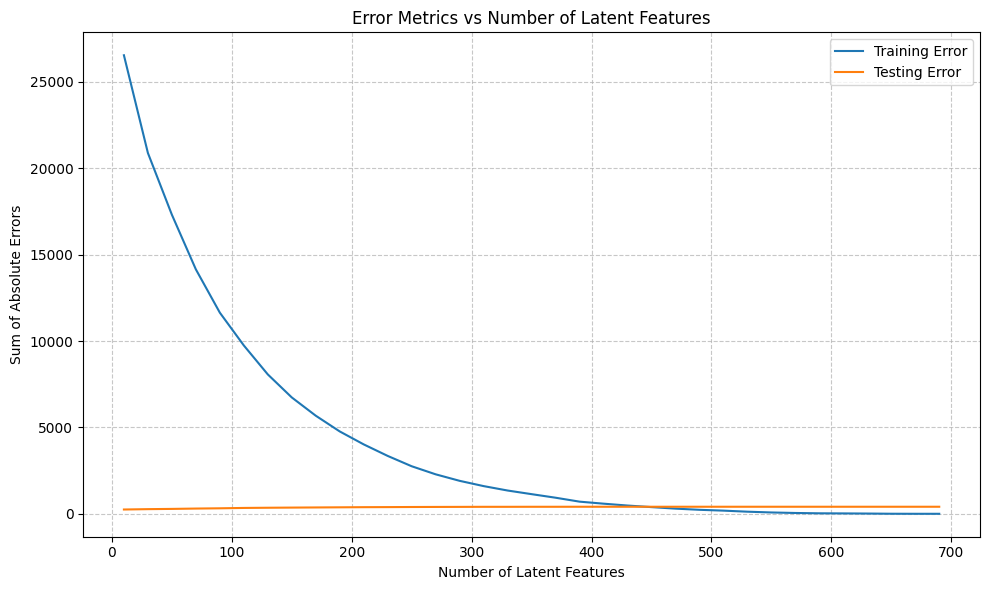

In [71]:
def plot_error_metrics(num_latent_feats, train_errors, test_errors):
    """
    Plot training and testing errors against number of latent features
    
    Parameters:
    -----------
    num_latent_feats : array-like
        Array of latent feature counts tested
    train_errors : array-like 
        Training error values
    test_errors : array-like
        Testing error values
    """
    plt.figure(figsize=(10, 6))
    
    # Plot training and test errors
    plt.plot(num_latent_feats, train_errors, label='Training Error')
    plt.plot(num_latent_feats, test_errors, label='Testing Error')
    
    # Add labels and title
    plt.xlabel('Number of Latent Features')
    plt.ylabel('Sum of Absolute Errors')
    plt.title('Error Metrics vs Number of Latent Features')
    
    # Add legend and grid
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Adjust layout and display
    plt.tight_layout()
    plt.show()

plot_error_metrics(num_latent_feats, train_errors, test_errors)

`6.` Use the cell below to comment on the results you found in the previous question. Given the circumstances of your results, discuss what you might do to determine if the recommendations you make with any of the above recommendation systems are an improvement to how users currently find articles? 

The analysis reveals an interesting pattern in the SVD (Singular Value Decomposition) model performance. While increasing latent features improves training accuracy, it negatively impacts test data accuracy due to overfitting. The optimal number of latent features appears to be around 80, where there's a balance between training and testing performance.

**Key findings:**

- The model currently can only make recommendations for 20 users present in both training and test sets
- The sparse matrix nature contributes to very high test accuracy (>99%)
80 latent features represent an ideal cutoff point before model degradation

**The practical implementation strategy suggests:**

Conducting A/B testing with new users
Testing group A: Using the recommendation engine
Testing group B: Using simple popular article recommendations
Measuring success through click-through rate comparisons
This approach would effectively validate the recommendation engine's real-world performance and provide clear metrics for deployment decisions.

In [82]:
# Saving
from subprocess import call
call(['python', '-m', 'nbconvert', 'Recommendations_with_IBM.ipynb', '--to', 'html'])

[NbConvertApp] Converting notebook Recommendations_with_IBM.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 607304 bytes to Recommendations_with_IBM.html


0